In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

In [3]:
X_train = np.linspace(-1,1,20)

In [4]:
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1, 1, 20)

In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

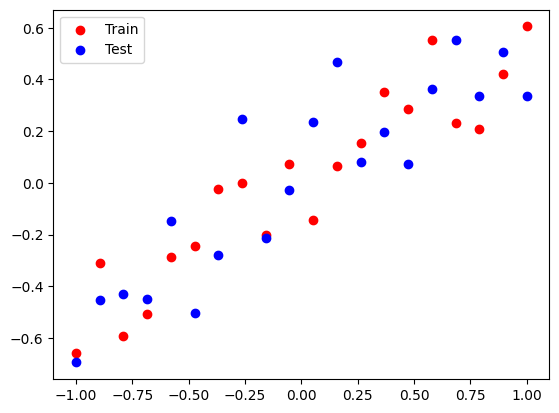

In [8]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [11]:
# Regression model without using dropout layers
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

In [12]:
# Evaluting the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0025929883122444153, Test: 0.045518018305301666


In [13]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 64ms/step


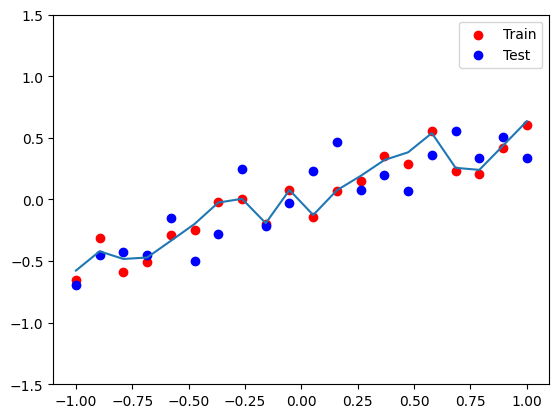

In [14]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [24]:
# Applying dropout layer

model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])
drop_out_history = model_2.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

In [25]:
# Evaluating the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.011880984529852867, Test: 0.03840752691030502


In [26]:
# We can see a bit of change like reduced some of the error

In [29]:
y_pred_2 = model_2.predict(X_test,verbose=0)

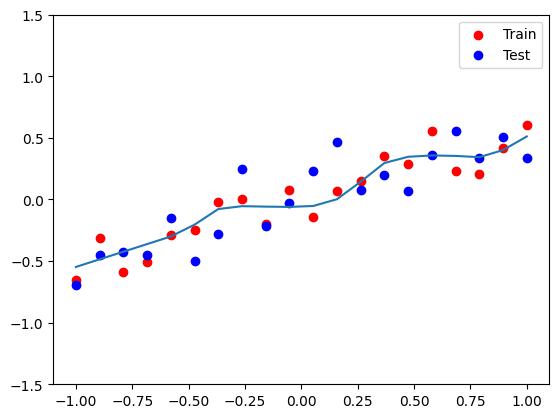

In [30]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [21]:
# So, we can see that , the regression line gets bit of smooth line than the previous one's spike line